In [1]:
import qiskit

In [2]:
print(qiskit.__version__)

2.1.1


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
token="Tss5FNainyTF6o7rgyBls_wXa3gYdO1KRscELDeaAGIw",
instance="crn:v1:bluemix:public:quantum-computing:us-east:a/8f638493159249b6b8cfe3bf3a5ae575:18dd035f-aec6-4180-be1a-64cb81ac63f9::",
overwrite=True,
)


In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
print("✅ Connecté à IBM Quantum !")


✅ Connecté à IBM Quantum !


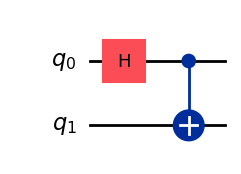

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [6]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

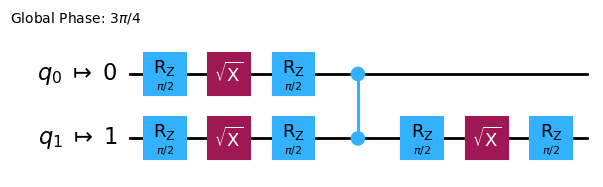

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

In [8]:
# Construct the Estimator instance.
#the estimator gives expectation values ⟨ZZ⟩, ⟨Z⟩, ⟨XX⟩ when we  want average correlations
estimator = Estimator(mode=backend)
#apply some error-reduction tricks
estimator.options.resilience_level = 1
#run the circuit 5000 times and average the results
estimator.options.default_shots = 5000

#we fix the observables to match the new qubit mapping.
#This uses the circuit’s layout (the mapping table)
#to translate the observable’s stored indices (logical 0,1,…) to the correct physical qubits
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
#Run one circuit and measure many observables on it.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
#tracking number.
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d42ldudo35ts73c6ubag


In [12]:
print(job.status())

DONE


WE WANT UNTIL THE JOB IS FINISHED ON THE QUANTUM COMPUTER 

In [15]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

Here,we try to actually analyze the results 

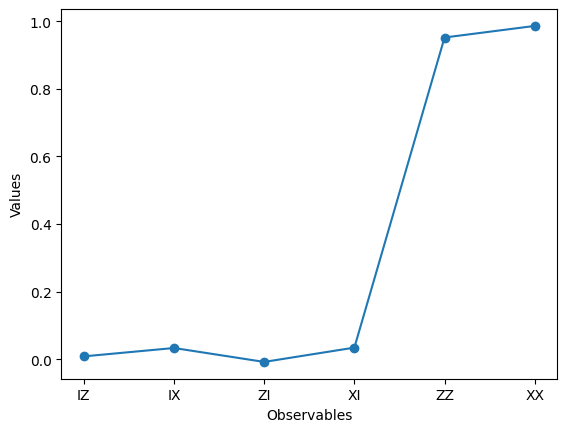

In [16]:
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()